PQC,00-09,09-18,18-27,27-36,36-45,45-54,54-63,63-72,72-81,81-90,90-99
PSI,,,,,,,,,,,
00-09,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
09-18,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
18-27,0.0,0.00,0.0,0.00,0.00,2.78,0.00,0.00,0.00,0.00,0.00
27-36,0.0,2.78,0.0,5.56,11.11,0.00,2.78,0.00,5.56,0.00,0.00
36-45,0.0,0.00,0.0,0.00,0.00,0.00,5.56,5.56,0.00,0.00,0.00
45-54,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
54-63,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
63-72,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.33
72-81,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,2.78,0.00,11.11


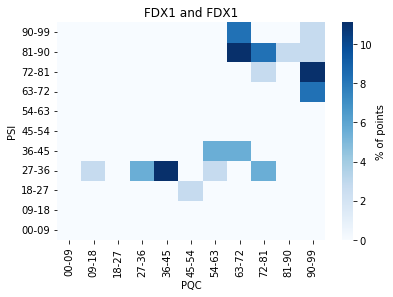

Task completed.....


In [28]:
import pandas as pd
import numpy as np
import os
from itertools import combinations_with_replacement
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
class idontknow:
    def __init__(self,file,p):
        self.p=p
        self.blastp=pd.read_excel(file,index_col=0)
        self.blastp.columns=self.blastp.index
        col=self.blastp.columns
        self.label=list(combinations_with_replacement(list(set(col)),2))
        val=self.blastp.iloc[:,:].values
        self.q=100-100%p
        dic_val={i:str(j).zfill(2)+'-'+str(j+self.p).zfill(2) for i,j in enumerate(range(0,self.q,self.p))} #### 10 will be included in 10-20 range, not 0-10.
        dic_val[len(dic_val)]=str(self.q-self.p).zfill(2)+'-'+str(self.q).zfill(2)
#         print(dic_val)
        
#         Create folder
        try:
            self.folder_name='_'.join(list(set(col)))
            os.mkdir(f'BLASTp_heatmap/{self.folder_name}')
        except FileExistsError:
            pass
        
#         Creating a DataFrame
        total_col=self.get_col()
        total_row=self.get_row()
        data=np.zeros((len(total_row),len(total_col)))
        self.df=pd.DataFrame(data,index=total_row,columns=total_col)
#         Created a DataFrame
        
        for ii in range(len(col)):
            for jj in range(ii+1,len(col)):
                name1=','.join(sorted([col[ii],col[jj]],reverse=True))
                pi_range=dic_val[val[ii,jj]//self.p]
                qc_range=dic_val[val[jj,ii]//self.p]
                name2= f'{pi_range},{qc_range}'
                self.df.loc[name1,name2]+=1
                
#         Calculating the percentage 
        for kk in self.df.index:
            vv=100/sum(list(self.df.loc[kk,:]))
            self.df.loc[kk,:]=self.df.loc[kk,:]*vv
            
#         Convert DataFrame to dict
        self.dd=self.df.round(2).to_dict('index')

    def get_col(self):
        colm=[]
        for i in range(0,self.q,self.p):
            for j in range(0,self.q,self.p):
                colm.append(str(i).zfill(2)+'-'+str(i+self.p).zfill(2)+','+str(j).zfill(2)+'-'+str(j+self.p).zfill(2))
#         print(colm)
        return colm
    
    def get_row(self):
        row=[]
        for i in self.label:
            row.append(','.join(sorted(list(i),reverse=True)))
        return row
    
    def heatmap(self):
        for i in self.dd.keys():
            prt1,prt2=i.split(',')
            model=defaultdict(list)
            for j,k in self.dd[i].items():
                name=j.split(',')
#                 print(name[0],name[1])
                model['PSI'].append(name[0])
                model['PQC'].append(name[1])
                model['Value'].append(k)
#             print(model)
            self.df_heat=pd.DataFrame(model).pivot('PSI','PQC','Value')
            display(self.df_heat)
            ax=sns.heatmap(self.df_heat,cbar_kws={'label':'% of points'},cmap='Blues')
            plt.title(f'{prt1.upper()} and {prt2.upper()}' )
            # plt.xlabel('PSI',fontsize=15)
            ax.invert_yaxis()
            plt.savefig(f'BLASTp_heatmap/{self.folder_name}/Heatmap_{prt1.upper()} and {prt2.upper()}.png',bbox_inches='tight',dpi=300)
            plt.show()
            plt.close()
            break          
a=idontknow('Ferredoxin/FXD1_FXD2_swissprot_mod_pariwise_blastp_matrix_0_0.xlsx',9) # Caution Indexing of the heatmap is being sorted eg: after 0-9 there is 18-27, instead of 9-18.
a.heatmap()
print('Task completed.....')